## (a) Implementation


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread

In [2]:
class KMeans:
    def __init__(self, k=3, min_iter=30):
        self.k = k
        self.min_iter = min_iter
        self.X = None
        self.labels = None
        self.clusters = {i: [] for i in range(k)}
        self.centroids = {}

    def update_centroid(self):
        for label, data in self.clusters.items():
            self.centroids[label] = np.mean(data, axis=0) if len(data) > 0 else 0

    def assign(self):
        distances = np.zeros((self.X.shape[0], self.k))
        for label, centroid in self.centroids.items():
            distances[:, label] = np.linalg.norm(self.X - centroid, axis=1)
        self.labels = np.argmin(distances, axis=1)
        self.clusters = {i: [] for i in range(self.k)}
        for i, label in enumerate(self.labels):
            self.clusters[label].append(self.X[i])

    def fit(self, X):
        # initial
        self.X = X
        indices = np.random.permutation(X.shape[0])
        parts = np.array_split(indices, self.k)
        for i in range(self.k):
            self.clusters[i] = X[parts[i]]

        # iteration update
        counter = 0
        prev = None
        while prev != self.centroids or counter < self.min_iter:
            self.update_centroid()
            self.assign()
            prev = self.centroids
            counter += 1

        # Store cluster labels in an additional column of X
        self.X = np.hstack((self.X, self.labels.reshape(-1, 1)))

### Test model with simple data


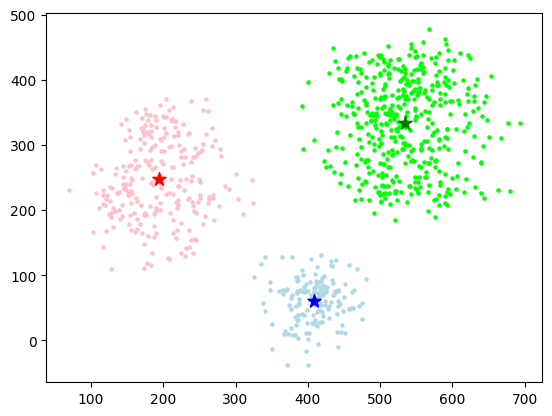

In [3]:
df = pd.read_csv("./data/cluster.csv")

model = KMeans(3)
model.fit(df[["x1", "x2"]].values)

for label, points in model.clusters.items():
    x = [p[0] for p in points]
    y = [p[1] for p in points]

    centroids_x, centroids_y = model.centroids[label]

    plt.scatter(x, y, c={0: "lightblue", 1: "pink", 2: "lime"}[label], s=5)
    plt.scatter(
        centroids_x, centroids_y, marker="*", c={0: "b", 1: "r", 2: "g"}[label], s=100
    )

plt.show()

### Compress picture


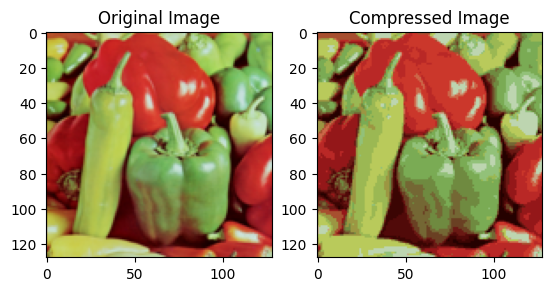

In [4]:
def compress(A):
    plt.subplot(1, 2, 1)
    plt.imshow(A)
    plt.title("Original Image")

    r = A[:, :, 0]
    g = A[:, :, 1]
    b = A[:, :, 2]

    image = np.dstack((r, g, b))
    height, width, dim = image.shape
    X = image.reshape(height * width, dim)

    model = KMeans(32)
    model.fit(X)

    new_image = np.zeros_like(X)
    for i in range(X.shape[0]):
        key = model.X[i, 3]
        new_image[i, :3] = model.centroids[key]

    new_image = new_image.reshape(image.shape)
    return new_image


before_image = imread("./data/peppers-small.tiff")
new_image = compress(before_image)
plt.subplot(1, 2, 2)
plt.imshow(new_image)
plt.title("Compressed Image")
plt.show()

---

## (b) compress factor


In [5]:
def get_compress_factor(before, after):
    before_image = np.array(before)
    pixels = before_image.reshape(-1, before_image.shape[-1])
    num_colors_before = len(np.unique(pixels, axis=0))

    after_iamge = np.array(after)
    pixels = after_iamge.reshape(-1, after_iamge.shape[-1])
    num_colors_after = len(np.unique(pixels, axis=0))

    print(
        f"Color before compress: {num_colors_before}, Color after compress: {num_colors_after}, ratio: {num_colors_before/num_colors_after}"
    )

In [6]:
get_compress_factor(before_image, new_image)

Color before compress: 14977, Color after compress: 19, ratio: 788.2631578947369
